# 230102 Day90

In [ ]:
# %cd : change directory
%cd /content

# yolov5 다운로드 및 폴더 생성
!git clone https://github.com/ultralytics/yolov5

# yolov5 로 디렉토리 변경
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14906, done.
remote: Total 14906 (delta 0), reused 0 (delta 0), pack-reused 14906
Receiving objects: 100% (14906/14906), 13.95 MiB | 30.66 MiB/s, done.
Resolving deltas: 100% (10237/10237), done.
/content/yolov5
     |████████████████████████████████| 184 kB 5.3 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 59.0 MB/s 


In [ ]:
# detecting
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-53-g65071da Python-3.8.16 torch-1.13.0+cu116 CPU

100% 14.1M/14.1M [00:00<00:00, 131MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 265.4ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 173.5ms
Speed: 1.8ms pre-process, 219.5ms inference, 10.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [ ]:
!pwd

/content/yolov5


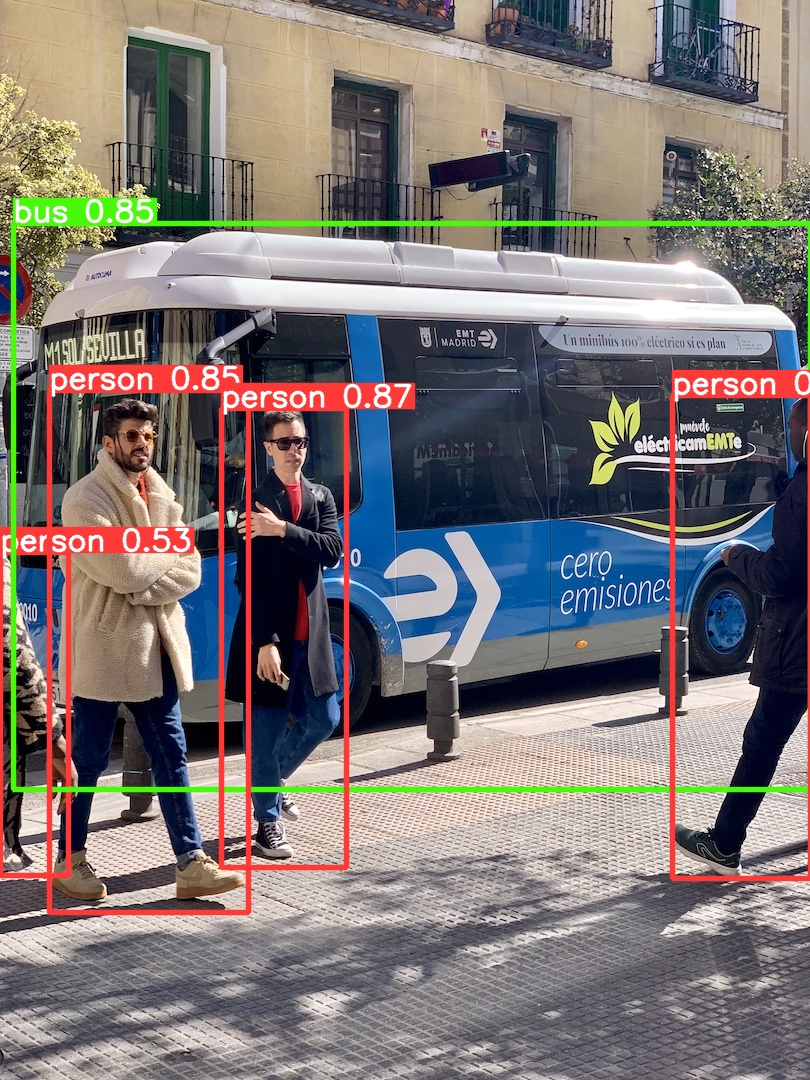

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp/bus.jpg', width=600)

## 특정 목적에 맞게 훈련하여 detecting
* 데이터셋 다운로드
 - 포트홀 데이터셋 : https://public.roboflow.com/object-detection/pothole
 - url copy : https://public.roboflow.com/ds/SmYfm04u10?key=DreIZLpvYf

In [ ]:
%mkdir /content/yolov5/pothole
%cd /content/yolov5/pothole

/content/yolov5/pothole


In [ ]:
!pwd

/content/yolov5/pothole


In [ ]:
# curl : 커맨드 아린용 데이터 전송 도구
# -L 옵션을 사용하여 HTTP 위치 헤더를 따르도록 함
# (리다이렉션을 따르도록 curl 을 사용할 수 있음)
!curl -L "https://public.roboflow.com/ds/SmYfm04u10?key=DreIZLpvYf" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3900      0 --:--:-- --:--:-- --:--:--  3900
100 46.0M  100 46.0M    0     0  92.0M      0 --:--:-- --:--:-- --:--:-- 92.0M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/images/img

In [ ]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
# glob 모듈의 glob 함수
# 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 변환
from glob import glob

train_img_list = glob('/content/yolov5/pothole/train/images/*.jpg')
test_img_list = glob('/content/yolov5/pothole/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/pothole/valid/images/*.jpg')

print(len(train_img_list), len(test_img_list), len(valid_img_list))

465 67 133


In [ ]:
with open('/content/yolov5/pothole/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/pothole/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')

with open('/content/yolov5/pothole/valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

## YAML
구성 파일 작성에 자주 사용되는 데이터 직렬화 언어\
YAML의 가장 흔한 용도 중 하나는 구성 파일을 생성하는 것이다\
YAML과 JSON은 대부분의 경우 서로 바꿔서 사용할 수 있지만 YAML이 JSON보다 가독성이 높고 더 사용자 친화적이기 때문에 구성 파일은 JSON이 아닌 YAML로 작성하는 것이 좋다

https://inpa.tistory.com/entry/YAML-%F0%9F%93%9A-yaml-%EA%B0%9C%EB%85%90-%EB%AC%B8%EB%B2%95-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%F0%9F%92%AF-%EC%B4%9D%EC%A0%95%EB%A6%AC#YAML_%EC%9D%B4%EB%9E%80?

* python decorater 사용\
함수를 수정하지 않은 상태에서 추가기능을 구현할 때 사용


In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic   # decorater
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))  # '**' : 딕셔너리 타입

In [ ]:
import yaml
%cat  /content/yolov5/pothole/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

In [ ]:
%%writetemplate /content/yolov5/pothole/data.yaml
train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']

In [ ]:
%cat /content/yolov5/pothole/data.yaml

train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']


In [ ]:
# 모델 구성
import yaml
with open('/content/yolov5/pothole/data.yaml', 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
num_classes

'1'

In [ ]:
# nc 를 80 --> num_classes 로 변경
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

### 학습(Training)
- img : 입력 이미지 크기 정의
- batch : 배치 크기 결정
- epochs : 학습 기간 개수 정의
- data : yaml 파일 경로
- cfg : 모델 구성 지정
- weights : 가중치에 대한 경로 지정
- name : 결과 이름
- nosave : 최종 체크포인트만 저장
- cache : 빠른 학습을 위한 이미지 캐시

In [ ]:
!pwd

/content/yolov5/pothole


In [ ]:
# GPU 에 연결되어있는 상태에서 실행
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epochs 100 --data ./pothole/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name pothole_results --cache

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls /content/yolov5/runs/train/pothole_results/

In [ ]:
Image(filename='')

In [ ]:
Image(filename='')

In [ ]:
# 검증
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./pothole/data.yaml --img 640 --iou 0.65

In [ ]:
# --task 설정을 해주지 않으면 default 로 'val' 이 적용된다
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./pothole/data.yaml --img 640 --task test

In [ ]:
!python detect.py --weights runs/train/pothole_results/weights/best.pt --img 640 --conf 0.4 --source ./pothole/test/images

In [ ]:
# 랜덤으로 뽑아서 결과 확인
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'))
display(Image(filename=image_name))

* 결과가 더 좋게 나오도록 하려면
 - 데이터 증식
 - 하이퍼 파라미터 조정
 - 다른 모델 사용해보기 (yolov7, yolov4, ...)

In [ ]:
# 재사용을 위해 가중치 저장 (모델 내보내기)
%cp /content/yolov5/runs/train/pothole_results/weights/best.pt /content/drive/MyDrive/Colab Notebooks

# 230103 Day91

## YOLOv5
- 사전에 학습된 모델
- 객체 탐지에 특화된 모델

https://lynnshin.tistory.com/47 \
https://github.com/ultralytics/yolov5.git

In [ ]:
%cd /content

# yolov5 폴더 불러오기
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14927, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14927 (delta 7), reused 6 (delta 0), pack-reused 14908
Receiving objects: 100% (14927/14927), 14.00 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (10254/10254), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.3 MB/s eta 0:00:00


### 안전모 데이터셋
https://public.roboflow.com/object-detection/hard-hat-workers

In [ ]:
# 새 폴더 생성
%mkdir /content/yolov5/hhw

# 디렉토리 변경
%cd /content/yolov5/hhw

/content/yolov5/hhw


In [ ]:
# curl : 커맨드 아린용 데이터 전송 도구
# -L 옵션을 사용하여 HTTP 위치 헤더를 따르도록 함
# (리다이렉션을 따르도록 curl 을 사용할 수 있음)

# 데이터 내려받기
!curl -L "https://public.roboflow.com/ds/L0ciM6za2n?key=cRYjR8tUT0" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# glob 모듈의 glob 함수 : 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
from glob import glob

# 이미지들을 리스트로
train_img_list = glob('/content/yolov5/hhw/train/images/*.jpg')
test_img_list = glob('/content/yolov5/hhw/test/images/*.jpg')

print(len(train_img_list), len(test_img_list))

5269 1766


In [ ]:
train_img_list[0]

'/content/yolov5/hhw/train/images/001626_jpg.rf.847ceda4c0bf346526d954243c936304.jpg'

In [ ]:
from sklearn.model_selection import train_test_split

# test 이미지 리스트를 테스트 & 검증 세트로 분리
test_img_list, val_img_list = train_test_split(test_img_list, test_size=0.5, random_state=777)

print(len(test_img_list), len(val_img_list))

883 883


In [ ]:
import yaml

# txt 파일에 리스트 
with open('/content/yolov5/hhw/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/hhw/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')

with open('/content/yolov5/hhw/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic    # decorator
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
import yaml

# 파일(들)을 순서대로 읽고 그 내용을 읽은 순서대로 표준 출력(standard output)
%cat /content/yolov5/hhw/data.yaml

train: ../train/images
val: ../valid/images

nc: 3
names: ['head', 'helmet', 'person']

In [ ]:
%%writetemplate /content/yolov5/hhw/data.yaml

train: ./hhw/train.txt
test: ./hhw/test.txt
val: ./hhw/val.txt

nc: 3
names: ['head', 'helmet', 'person']

In [ ]:
%cat /content/yolov5/hhw/data.yaml


train: ./hhw/train.txt
test: ./hhw/test.txt
val: ./hhw/val.txt

nc: 3
names: ['head', 'helmet', 'person']


In [ ]:
# 모델 구성
with open('/content/yolov5/hhw/data.yaml', 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
num_classes

'3'

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

In [ ]:
!pwd

/content/yolov5/hhw


In [ ]:
# 학습
%%time
%cd /content/yolov5
!python train.py --img 416 --batch 64 --epochs 50 --data ./hhw/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name hhw_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./hhw/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=hhw_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

In [ ]:
!ls /content/yolov5/runs/train/hhw_results2

confusion_matrix.png				    results.png
events.out.tfevents.1672712122.7bc9aaac1d5f.3637.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


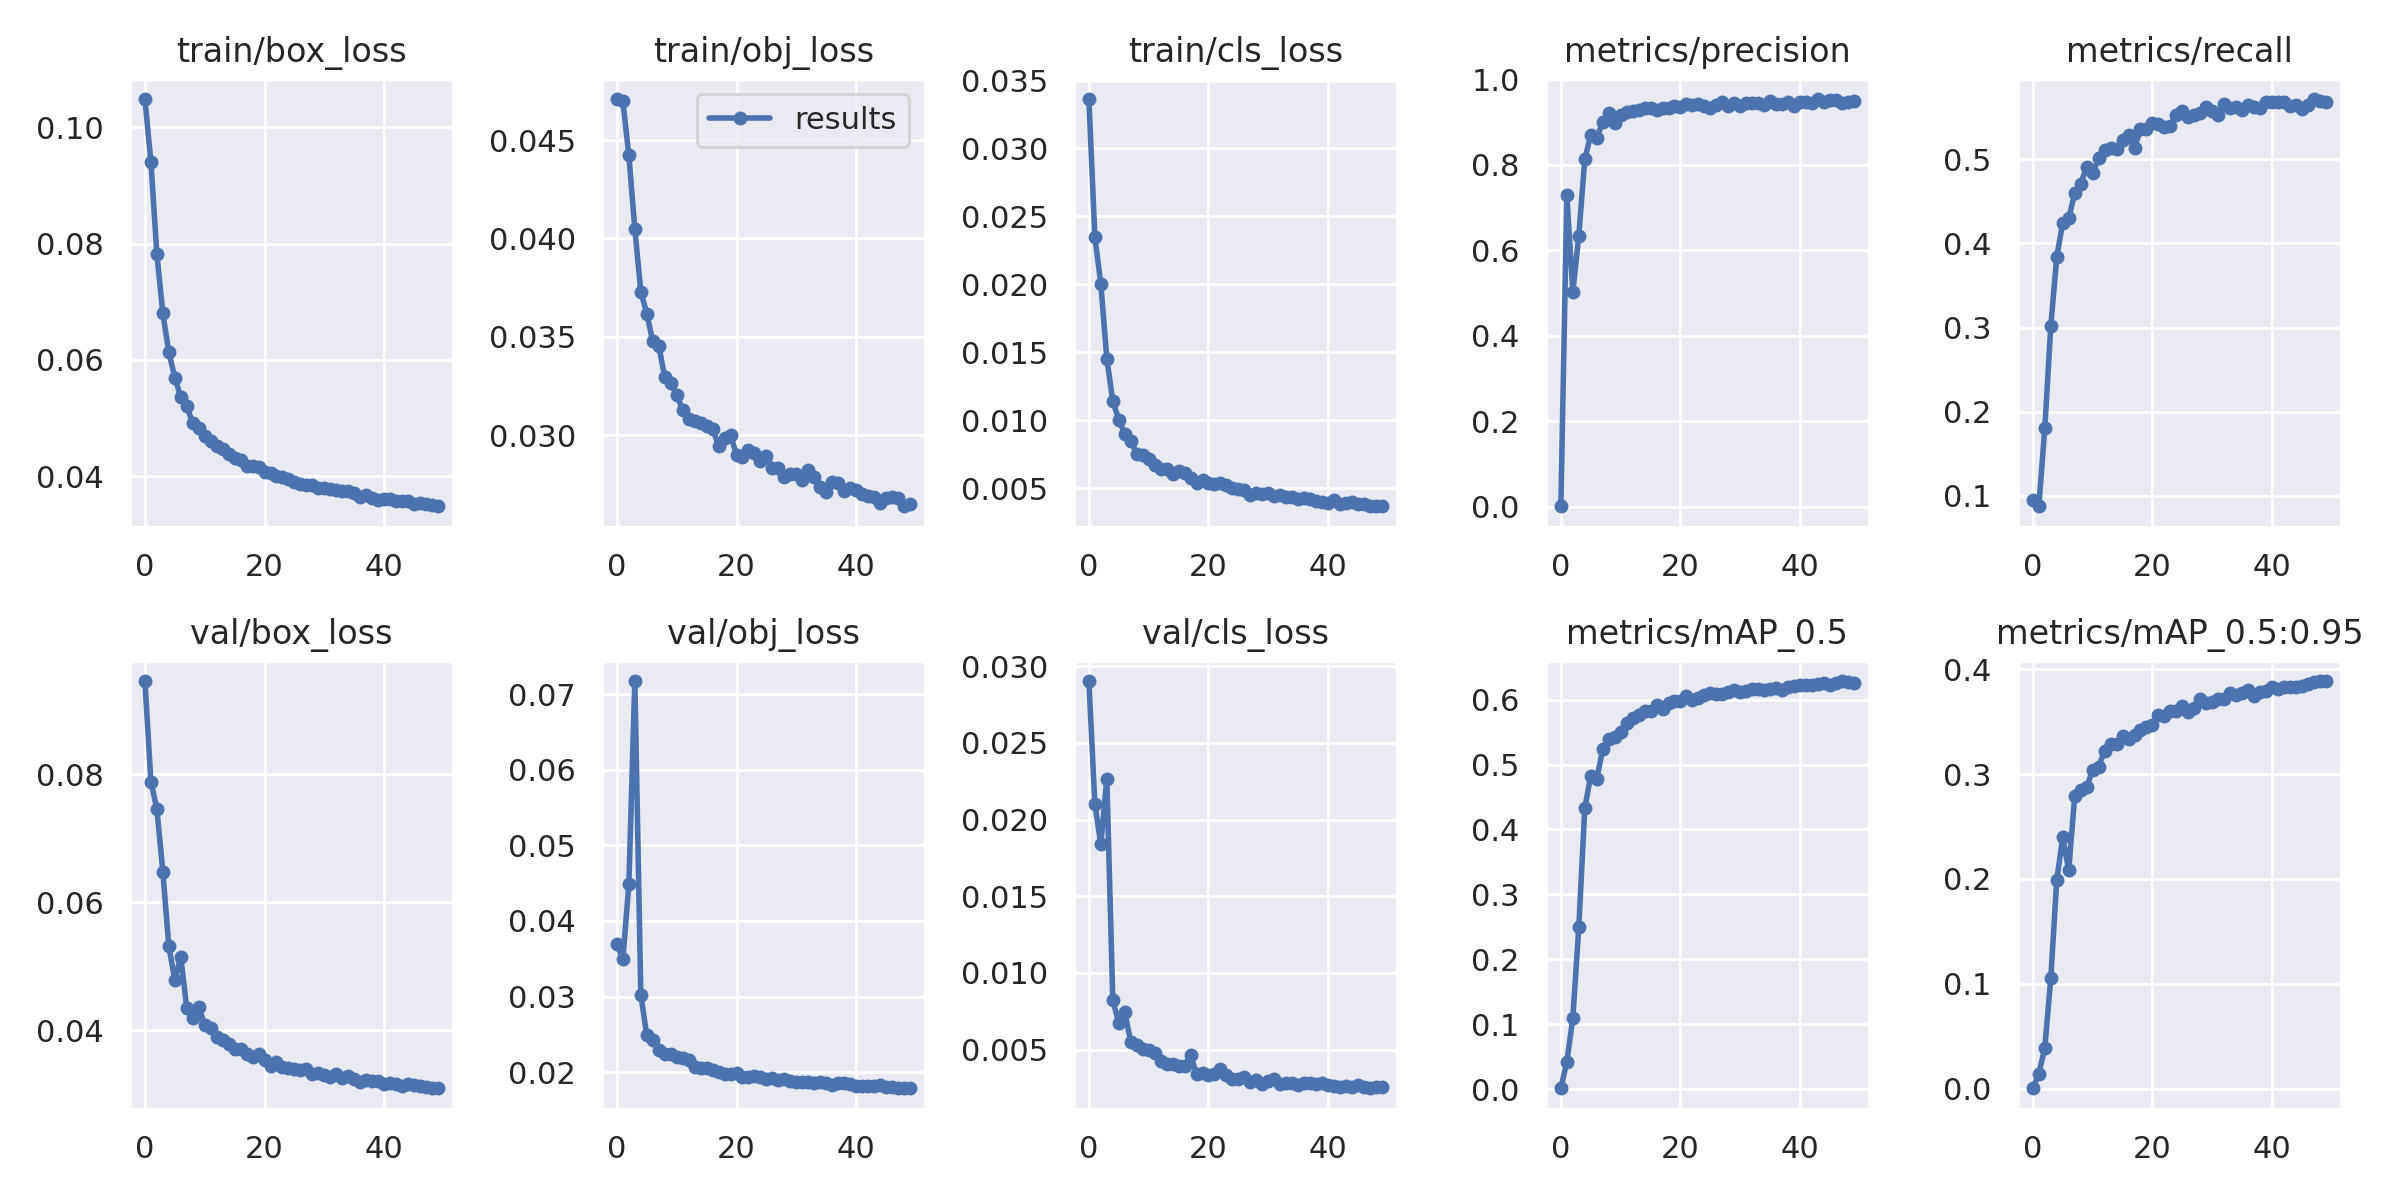

In [ ]:
Image(filename='/content/yolov5/runs/train/hhw_results2/results.png', width=1000)

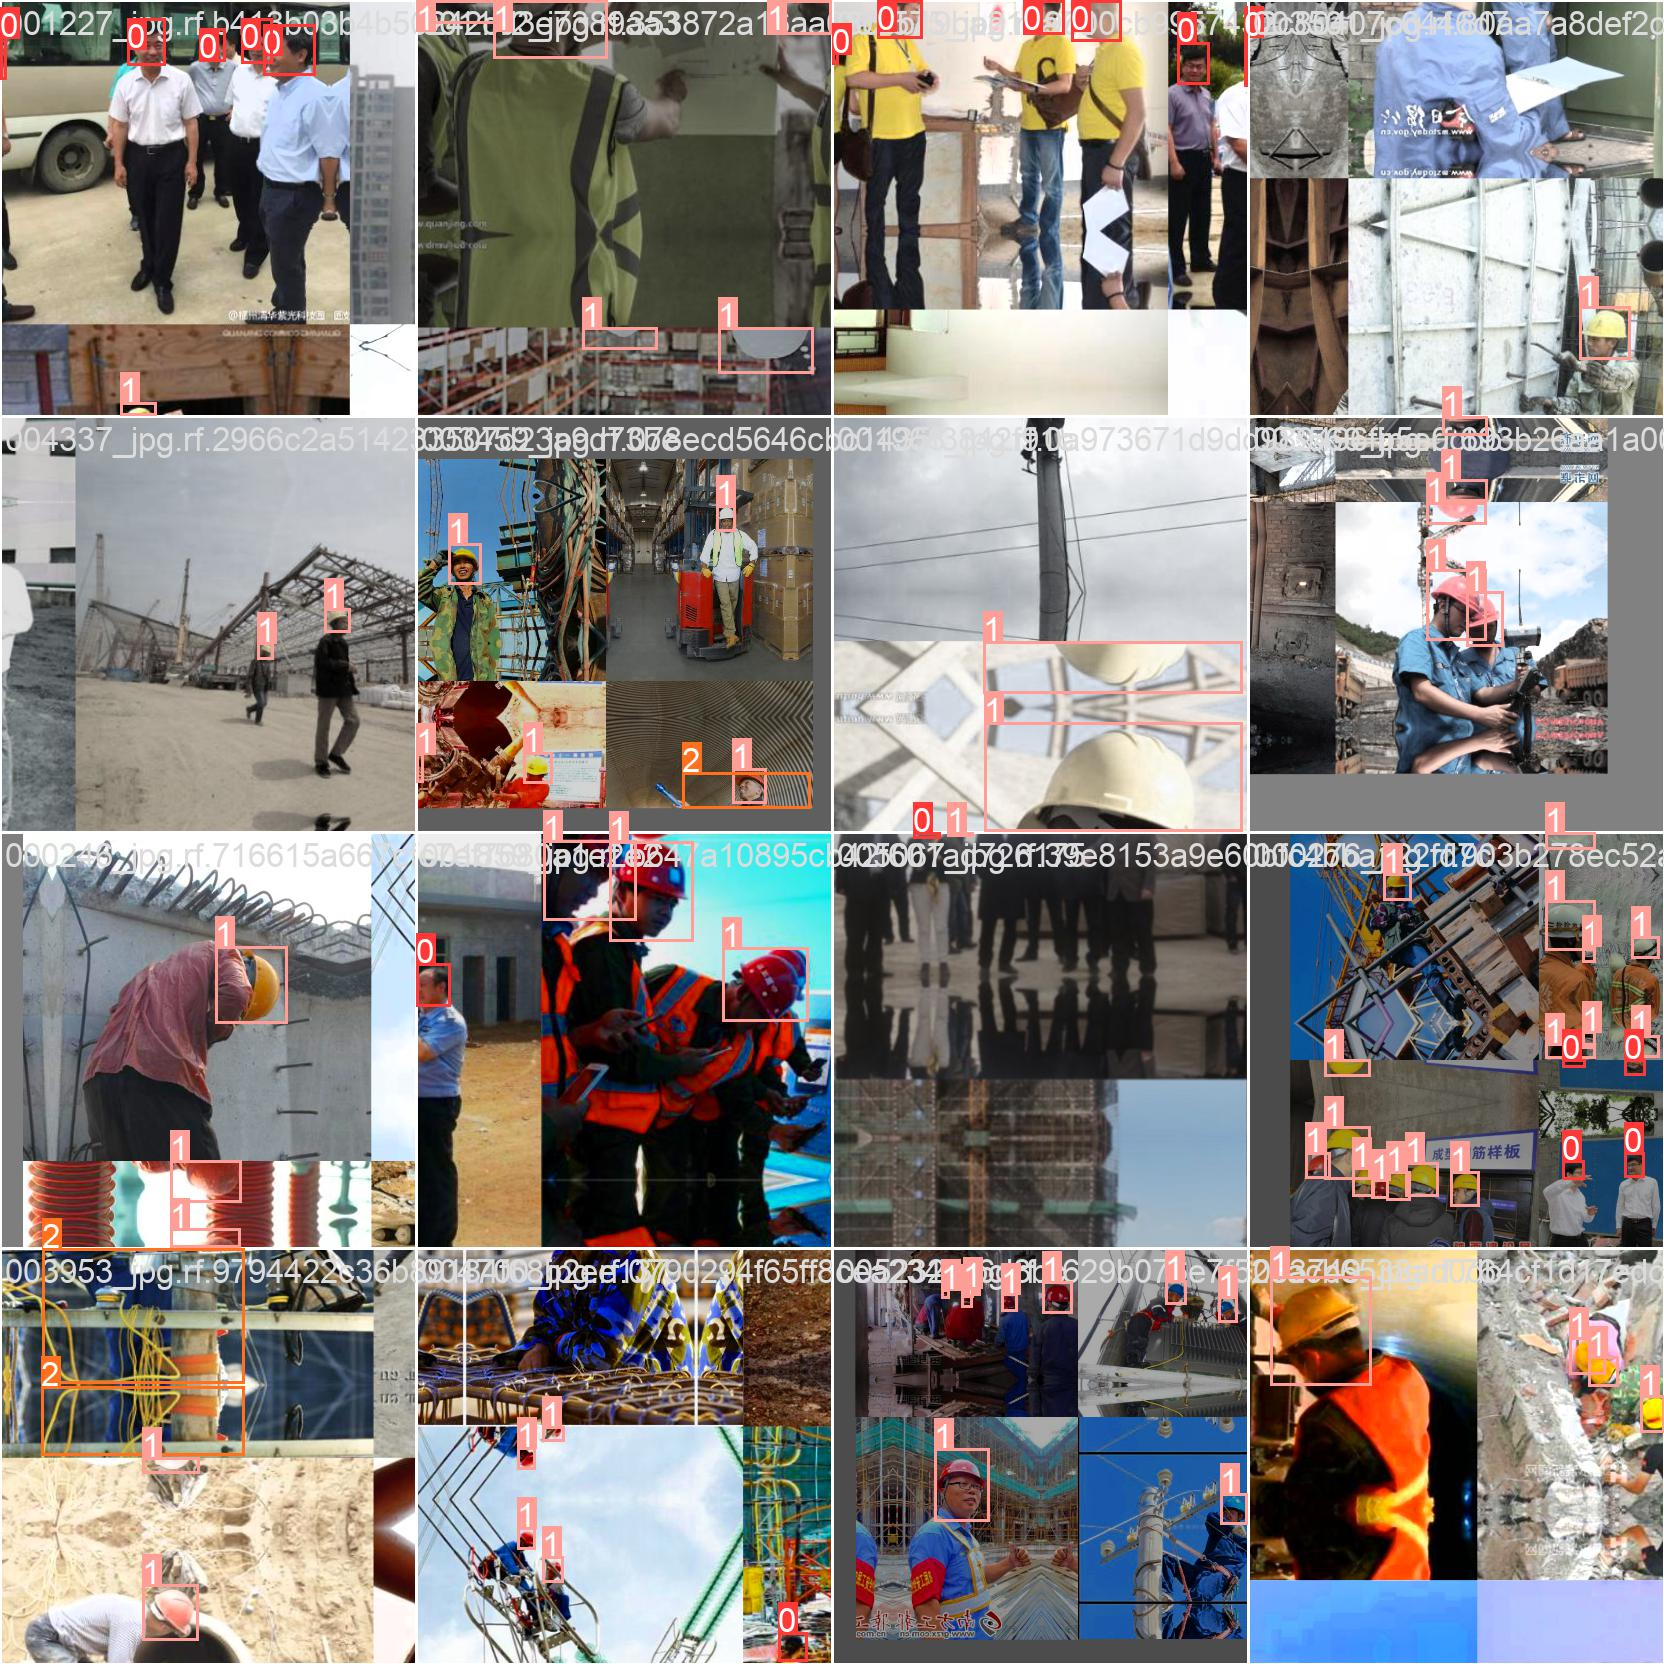

In [ ]:
Image(filename='/content/yolov5/runs/train/hhw_results2/train_batch0.jpg', width=1000)

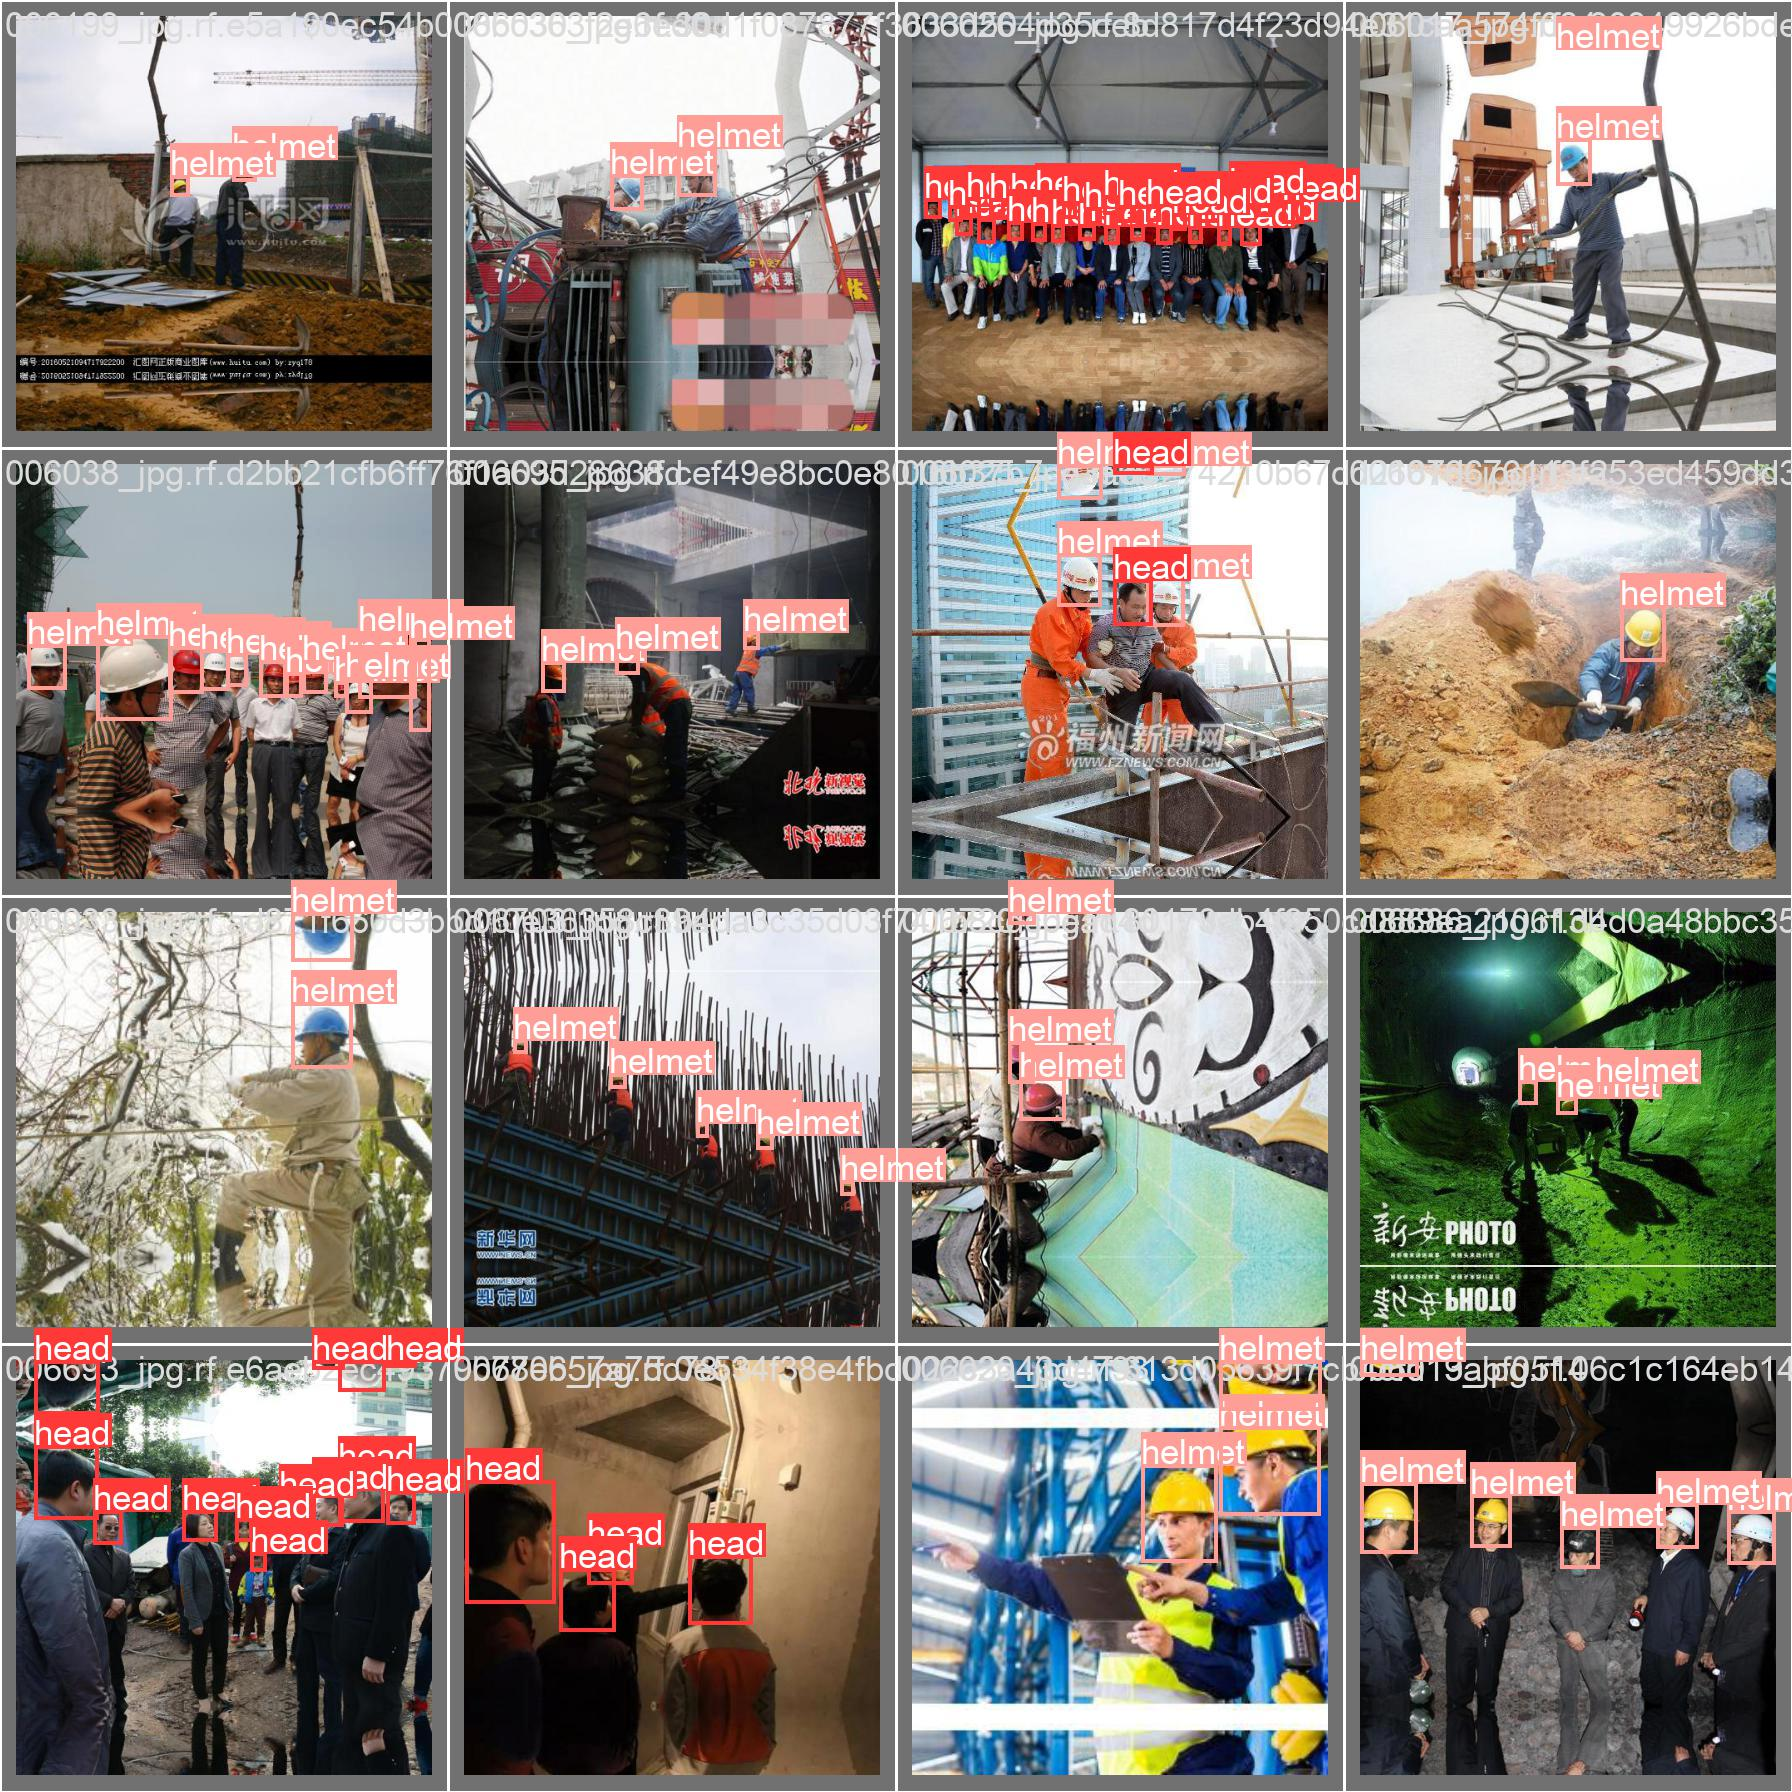

In [ ]:
Image(filename='/content/yolov5/runs/train/hhw_results2/val_batch0_labels.jpg', width=1000)

In [ ]:
# 검증
!python val.py --weights runs/train/hhw_results2/weights/best.pt --data .hhw/data.yaml --img 416 --iou 0.65 --half

Traceback (most recent call last):
  File "val.py", line 407, in <module>
    opt = parse_opt()
  File "val.py", line 364, in parse_opt
    opt.data = check_yaml(opt.data)  # check YAML
  File "/content/yolov5/utils/general.py", line 457, in check_yaml
    return check_file(file, suffix)
  File "/content/yolov5/utils/general.py", line 483, in check_file
    assert len(files), f'File not found: {file}'  # assert file was found
AssertionError: File not found: .hhw/data.yaml


In [ ]:
# --task 설정을 해주지 않으면 default로 'val'이 적용된다.
!python val.py --weights runs/train/hhw_results2/weights/best.pt --data ./hhw/data.yaml --img 416 --task test

val: data=./hhw/data.yaml, weights=['runs/train/hhw_results2/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/hhw/test... 883 images, 0 backgrounds, 0 corrupt: 100% 883/883 [00:00<00:00, 3338.76it/s]
test: New cache created: /content/yolov5/hhw/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 28/28 [00:08<00:00,  3.15it/s]
                   all        883       4269      0.951      0.577      0.619      0.393
                  head        883       1063       0.92

In [ ]:
# 추론
!python detect.py --weights runs/train/hhw_results2/weights/best.pt --img 416 --conf 0.4 --source ./hhw/test/images

detect: weights=['runs/train/hhw_results2/weights/best.pt'], source=./hhw/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1766 /content/yolov5/hhw/test/images/005298_jpg.rf.7d1070e4a462d4c636a68e64f2013761.jpg: 416x416 6 helmets, 8.1ms
image 2/1766 /content/yolov5/hhw/test/images/005299_jpg.rf.a79cacc62cdd99ad871cf1786ad865ff.jpg: 416x416 1 helmet, 8.1ms
image 3/1766 /content/yolov5/hhw/test/images/005300_jpg.rf.419d88422f77db5d30bbb0e769c7c6

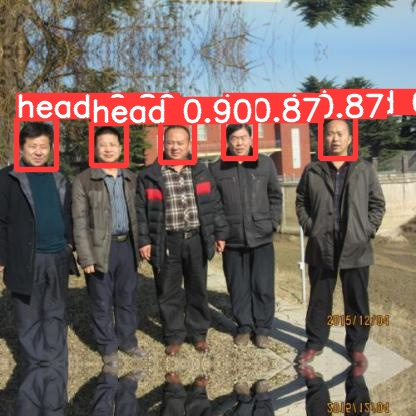

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

In [ ]:
# 모델 내보내기
%cp /content/yolov5/runs/train/hhw_results/weights/best.pt /content/drive/MyDrive

In [ ]:
# 저장된 모델 불러오기
%cp /content/drive/MyDrive/best.pt /content/yolov5

In [ ]:
# 저장된 모델로 detecting
!python detect.py --weights best.pt --img 416 --conf 0.25 --source hhw/test/images/

### 주차공간 데이터셋
https://public.roboflow.com/object-detection/pklot

In [ ]:
%cd /content

# yolov5 폴더 불러오기
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14927, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14927 (delta 7), reused 6 (delta 0), pack-reused 14908
Receiving objects: 100% (14927/14927), 13.95 MiB | 12.21 MiB/s, done.
Resolving deltas: 100% (10251/10251), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.8 MB/s eta 0:00:00


In [ ]:
%mkdir /content/yolov5/pklot
%cd /content/yolov5/pklot

/content/yolov5/pklot


In [ ]:
!curl -L 'https://public.roboflow.com/ds/u5bwvxO3fg?key=yypDl0kBMt' > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
from glob import glob

# 이미지들을 리스트로
train_img_list = glob('/content/yolov5/pklot/train/images/*.jpg')
test_img_list = glob('/content/yolov5/pklot/test/images/*.jpg')

print(len(train_img_list), len(test_img_list))

8691 1242


In [ ]:
train_img_list[0]

'/content/yolov5/hhw/train/images/001626_jpg.rf.847ceda4c0bf346526d954243c936304.jpg'

In [ ]:
from sklearn.model_selection import train_test_split

# test 이미지 리스트를 테스트 & 검증 세트로 분리
test_img_list, val_img_list = train_test_split(test_img_list, test_size=0.5, random_state=777)

print(len(test_img_list), len(val_img_list))

621 621


In [ ]:
import yaml

# txt 파일에 리스트 
with open('/content/yolov5/pklot/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/pklot/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')

with open('/content/yolov5/pklot/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')


In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic    # decorator
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
import yaml
%cat /content/yolov5/pklot/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['space-empty', 'space-occupied']

In [ ]:
%%writetemplate /content/yolov5/pklot/data.yaml

train: ./pklot/train.txt
test: ./pklot/test.txt
val: ./pklot/val.txt

nc: 2
names: ['space-empty', 'space-occupied']

In [ ]:
%cat /content/yolov5/pklot/data.yaml


train: ./pklot/train.txt
test: ./pklot/test.txt
val: ./pklot/val.txt

nc: 2
names: ['space-empty', 'space-occupied']


In [ ]:
# 모델 구성
with open('/content/yolov5/pklot/data.yaml', 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
num_classes

'2'

In [ ]:
# custom_yolov5s.yaml 생성

%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
# 확인
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

In [ ]:
!pwd

/content/yolov5/pklot


In [ ]:
# 학습 (가중치를 찾기 때문에 가중치를 빈칸으로 둔다)
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epochs 10 --data ./pklot/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name pklot_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./pklot/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=pklot_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f

In [ ]:
!ls /content/yolov5/runs/train/pklot_results

confusion_matrix.png				    results.png
events.out.tfevents.1672797058.db5b0255e662.2263.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


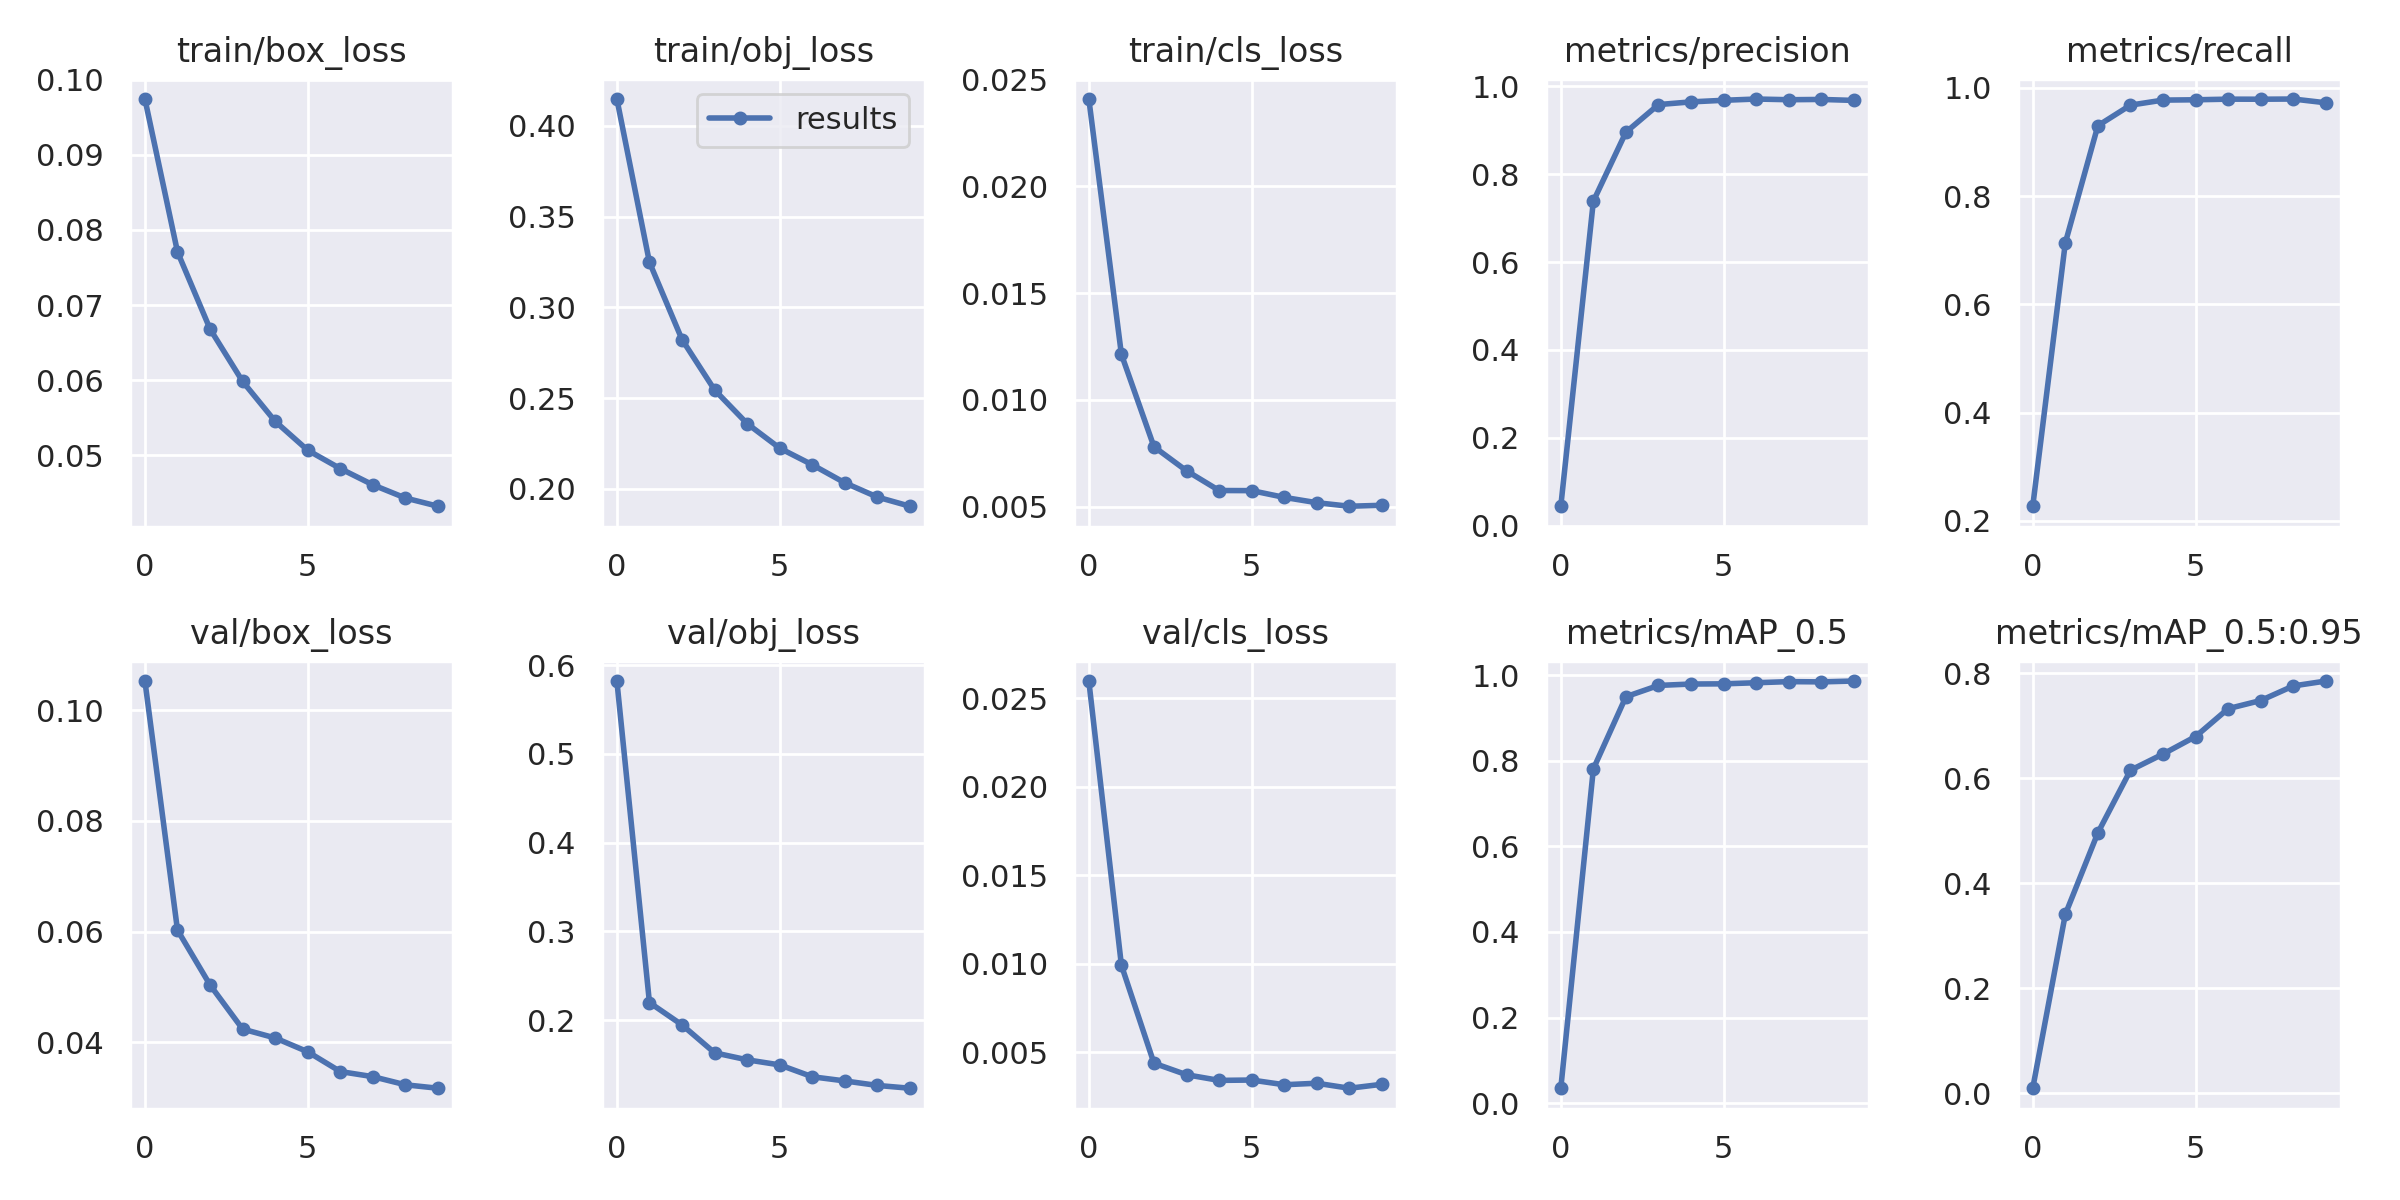

In [ ]:
Image(filename='/content/yolov5/runs/train/pklot_results/results.png', width=1000)

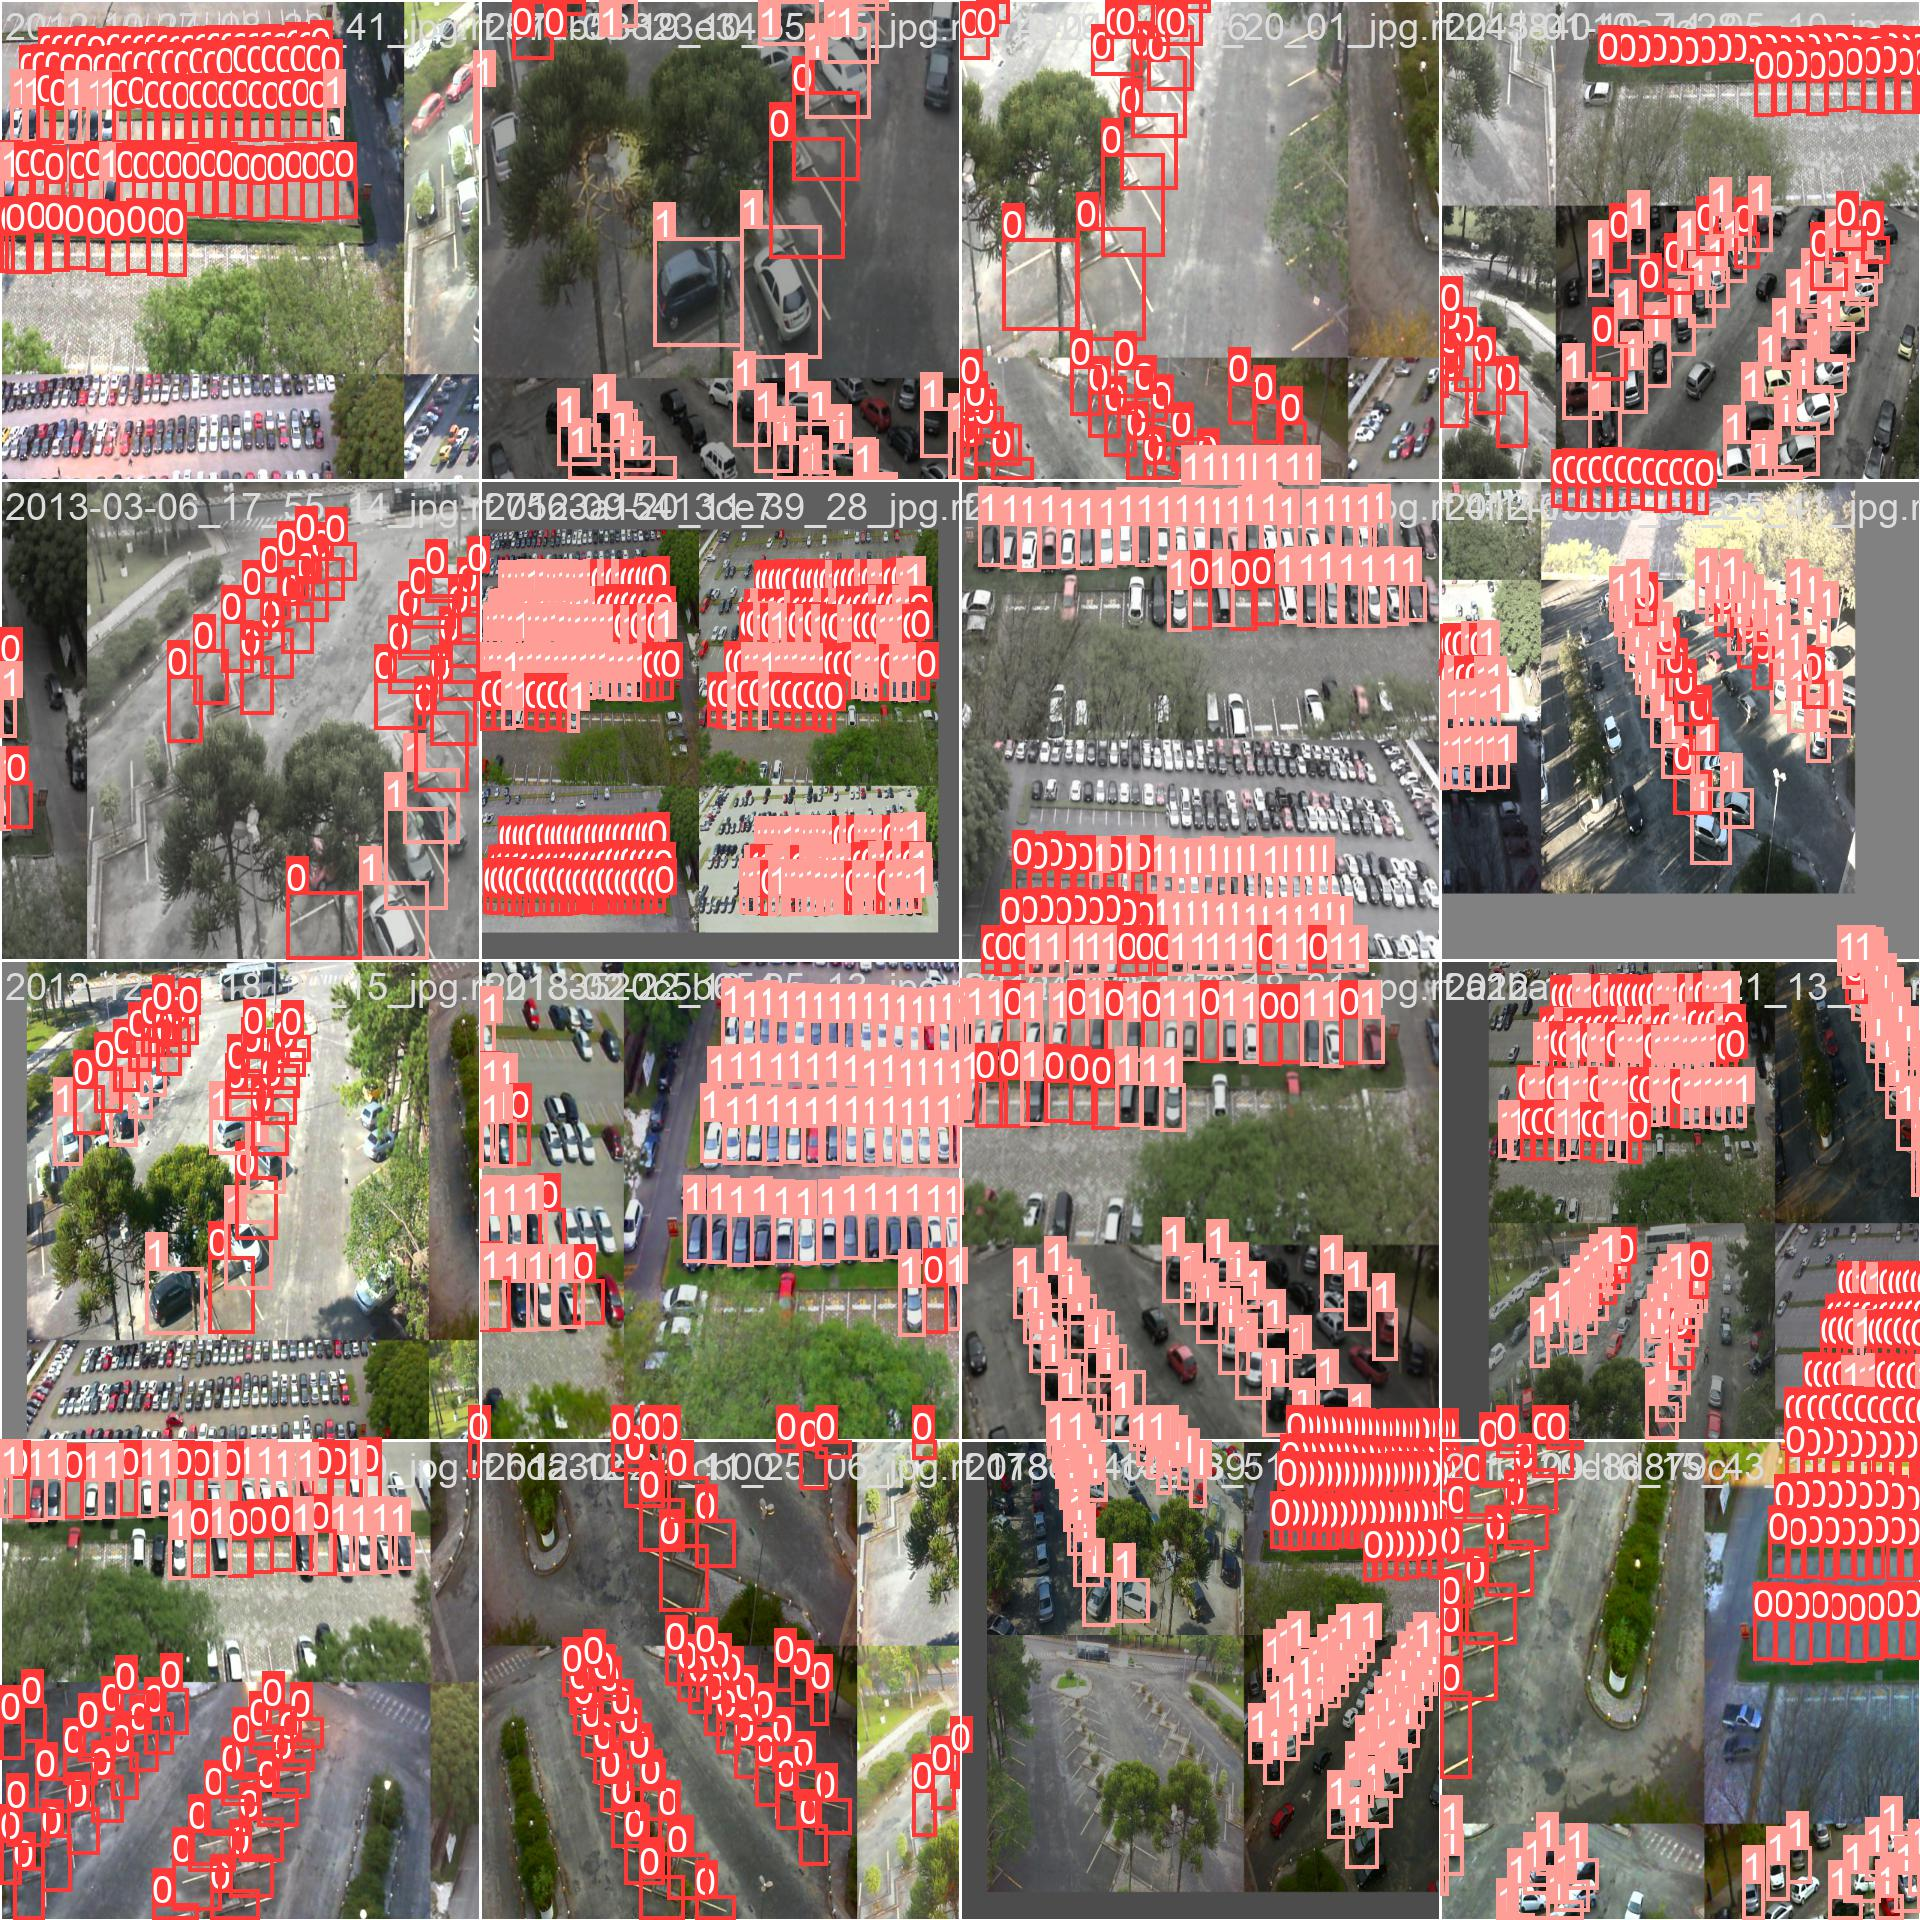

In [ ]:
Image(filename='/content/yolov5/runs/train/pklot_results/train_batch0.jpg', width=1000)

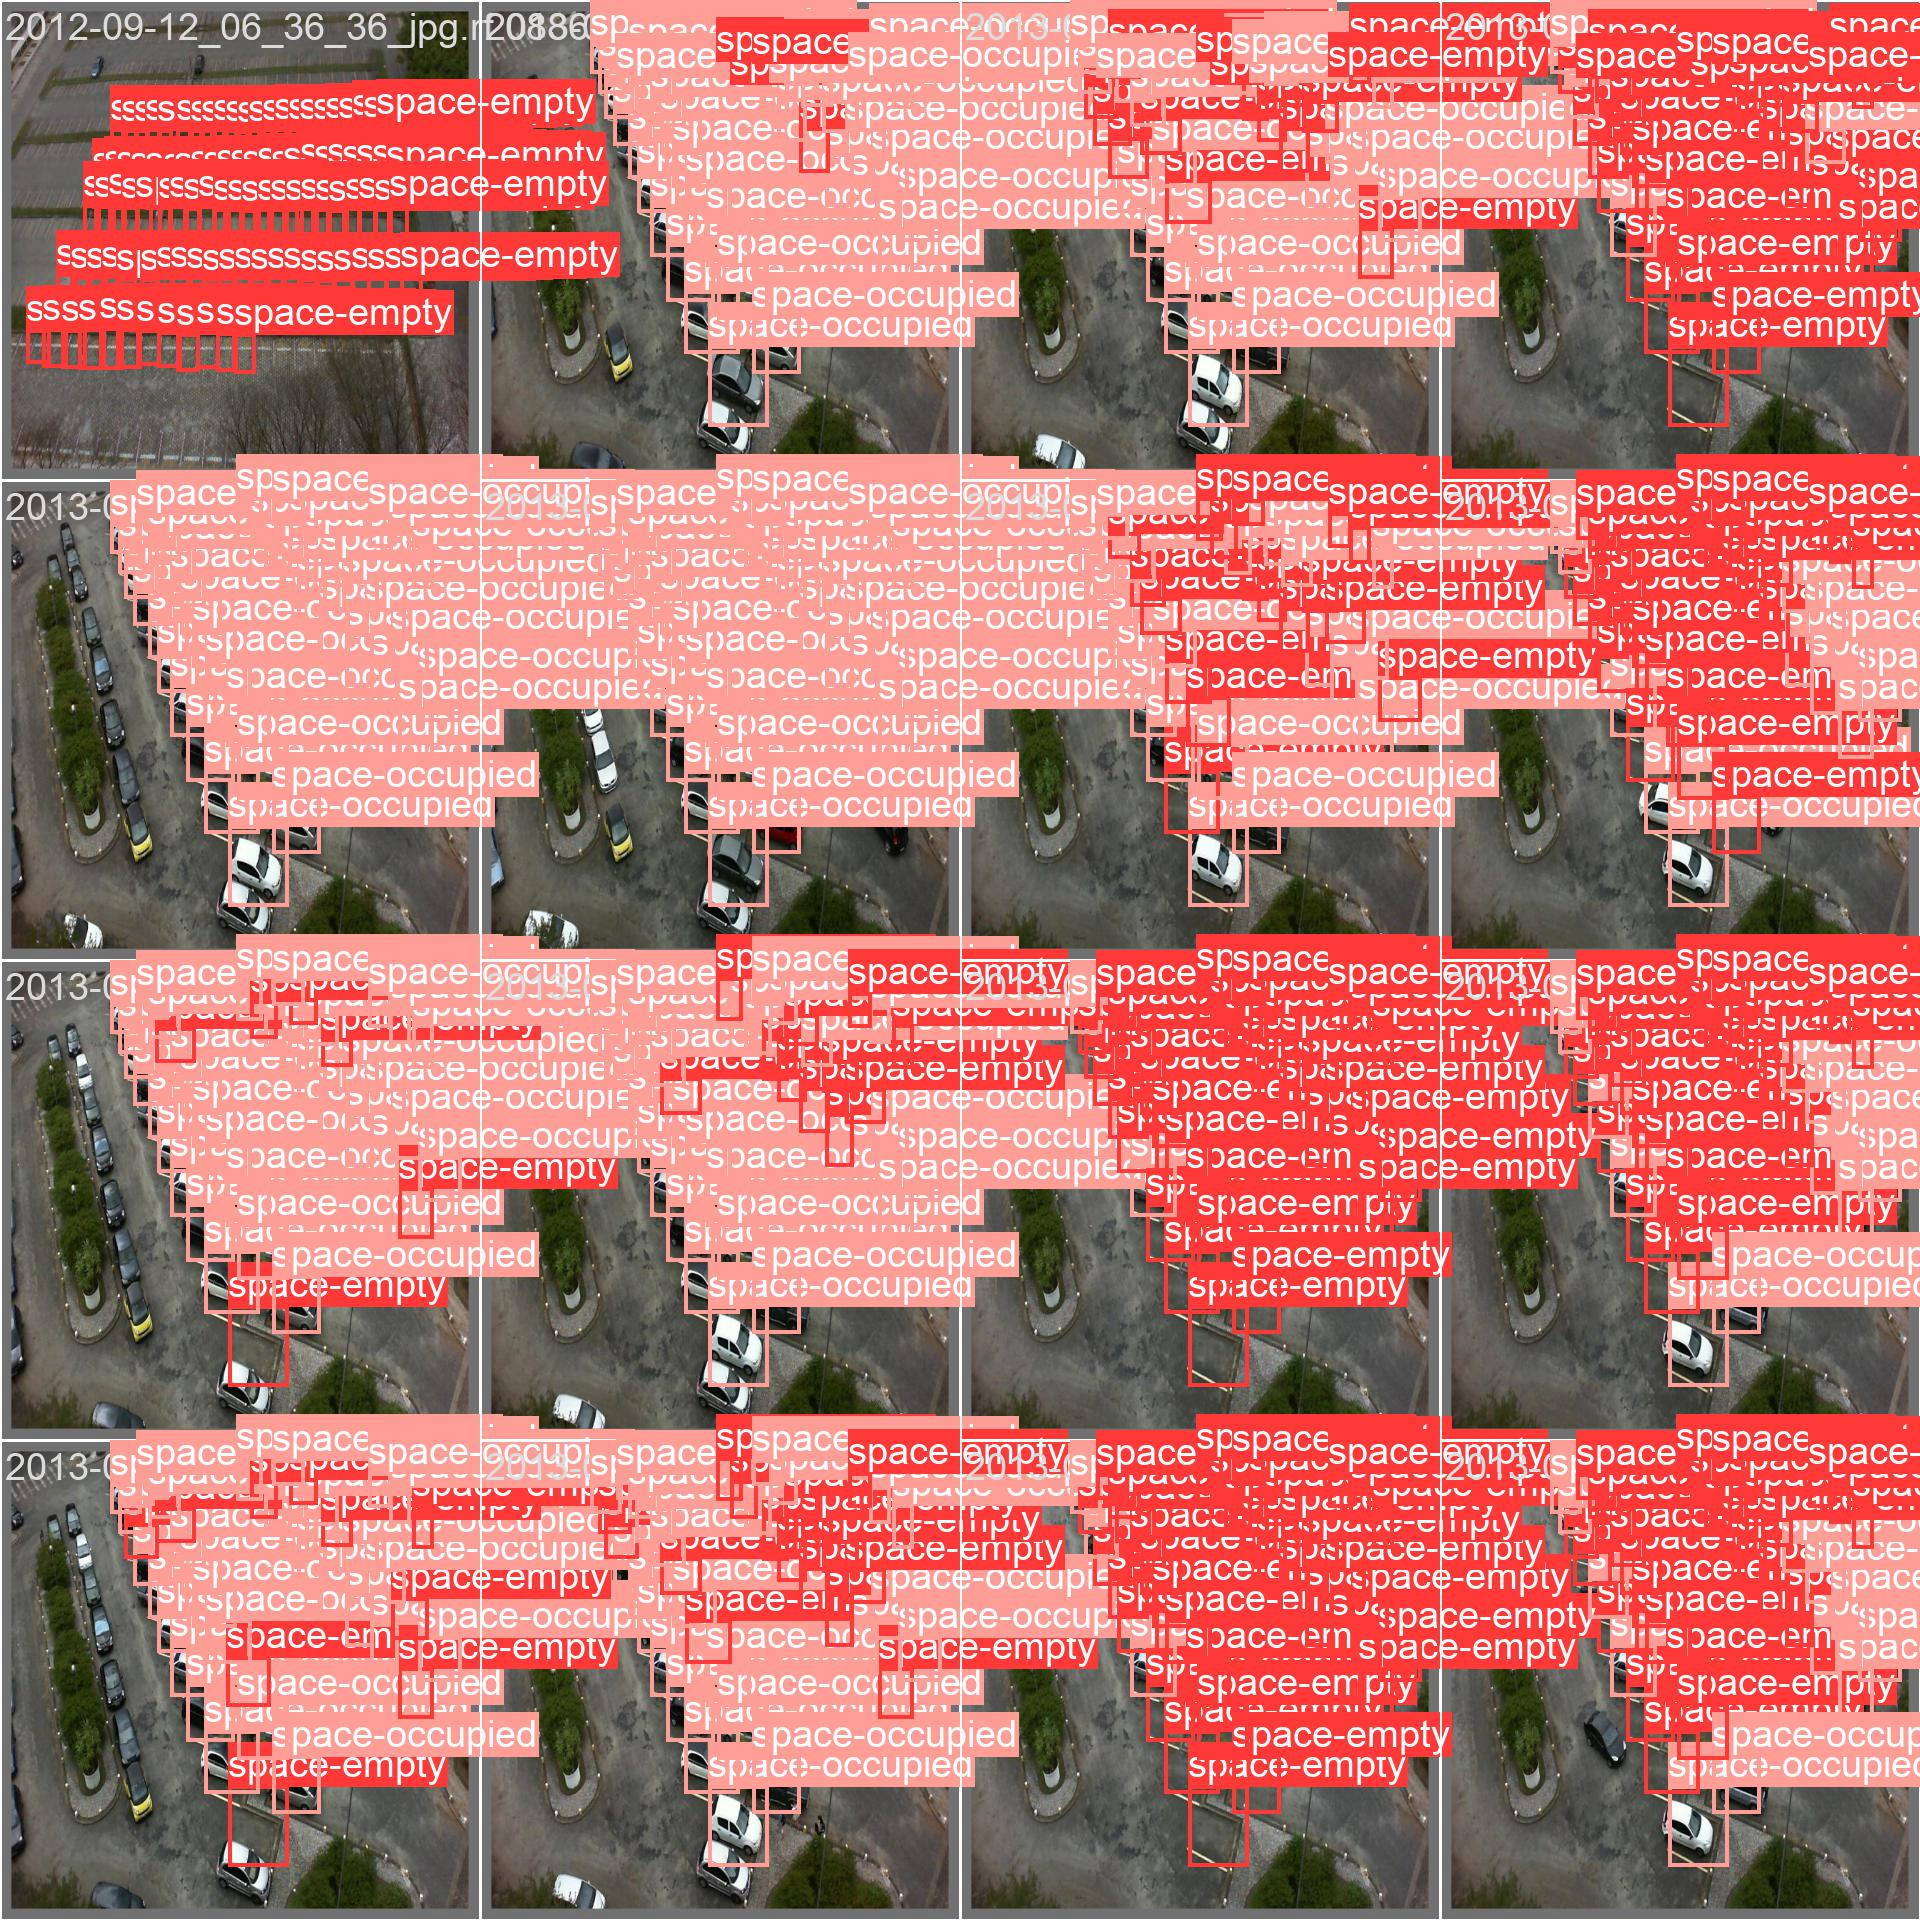

In [ ]:
Image(filename='/content/yolov5/runs/train/pklot_results/val_batch0_labels.jpg', width=1000)

In [ ]:
# 검증
!python val.py --weights runs/train/pklot_results/weights/best.pt --data ./pklot/data.yaml --img 416 --iou 0.65 --half

val: data=./pklot/data.yaml, weights=['runs/train/pklot_results/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/pklot/val.cache... 621 images, 16 backgrounds, 0 corrupt: 100% 621/621 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  10% 2/20 [00:07<01:09,  3.87s/it]WARNING ⚠️ NMS time limit 2.100s exceeded
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  15% 3/20 [00:11<01:11,  4.20s/it]WARNING ⚠️ NMS time limit 2.100s exce

In [ ]:
# --task 설정을 해주지 않으면 default로 'val'이 적용된다.
!python val.py --weights runs/train/pklot_results/weights/best.pt --data ./pklot/data.yaml --img 416 --task test

val: data=./pklot/data.yaml, weights=['runs/train/pklot_results/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/pklot/test... 621 images, 10 backgrounds, 0 corrupt: 100% 621/621 [00:00<00:00, 1416.47it/s]
test: New cache created: /content/yolov5/pklot/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   5% 1/20 [00:01<00:36,  1.92s/it]WARNING ⚠️ NMS time limit 2.100s exceeded
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  10% 2

In [ ]:
# 추론
!python detect.py --weights runs/train/pklot_results/weights/best.pt --img 416 --conf 0.4 --source ./pklot/test/images

detect: weights=['runs/train/pklot_results/weights/best.pt'], source=./pklot/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1242 /content/yolov5/pklot/test/images/2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg: 416x416 29 space-emptys, 69 space-occupieds, 8.1ms
image 2/1242 /content/yolov5/pklot/test/images/2012-09-11_16_48_36_jpg.rf.4ecc8c87c61680ccc73edc218a2c8d7d.jpg: 416x416 25 space-emptys, 73 space-occupieds, 8.2ms
ima

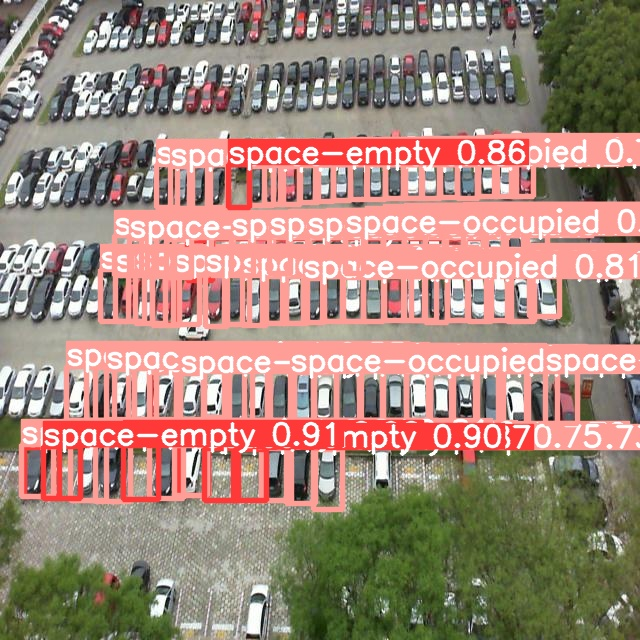

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

In [ ]:
# 모델 내보내기
%cp /content/yolov5/runs/train/pklot_results/weights/best.pt /content/drive/MyDrive

# 230104 Day92

In [ ]:
%cd /content

# yolov5 폴더 불러오기
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14927, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14927 (delta 7), reused 6 (delta 0), pack-reused 14908
Receiving objects: 100% (14927/14927), 14.00 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (10254/10254), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.3 MB/s eta 0:00:00


## yolov5s.pt 를 적용하여 추가 학습 없이 detecting

* 안전모 데이터셋
https://public.roboflow.com/object-detection/hard-hat-workers

In [ ]:
# 새 폴더 생성
%mkdir /content/yolov5/hhw

# 디렉토리 변경
%cd /content/yolov5/hhw

/content/yolov5/hhw


In [ ]:
# curl : 커맨드 아린용 데이터 전송 도구
# -L 옵션을 사용하여 HTTP 위치 헤더를 따르도록 함
# (리다이렉션을 따르도록 curl 을 사용할 수 있음)

# 데이터 내려받기
!curl -L "https://public.roboflow.com/ds/L0ciM6za2n?key=cRYjR8tUT0" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# yolov5s.pt 를 적용하여 추가 학습 없이 detecting
%cd /content/yolov5
!python detect.py --weights yolov5s.pt --img 416 --conf 0.25 --source hhw/test/images

/content/yolov5
detect: weights=['yolov5s.pt'], source=hhw/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:01<00:00, 7.78MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1766 /content/yolov5/hhw/test/images/005298_jpg.rf.7d1070e4a462d4c636a68e64f2013761.jpg: 416x416 6 persons, 8.5ms
image 2/1766 /content/yolov5/hhw/test/images/005299_jpg.rf.a79cacc62cdd99ad871cf1786ad865ff.jpg: 416x416 (no detections), 8.6ms
image 3/1766 /content/yolov5/hhw/test/images/005300_jpg.rf.419d88422f77db5

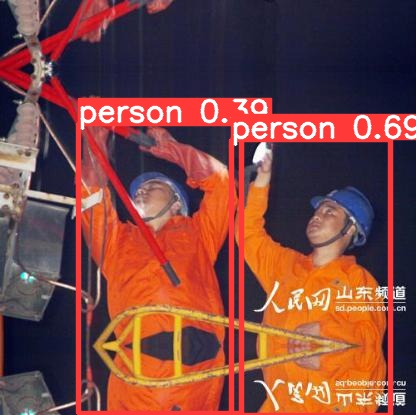

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

### 헬멧을 구별하기 위한 모델 실행

In [ ]:
# 저장된 모델 불러오기
%cp /content/drive/MyDrive/Colab_Notebooks/best.pt /content/yolov5

In [ ]:
# 저장된 모델로 detecting
!python detect.py --weights best.pt --img 416 --conf 0.25 --source hhw/test/images/

detect: weights=['best.pt'], source=hhw/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1766 /content/yolov5/hhw/test/images/005298_jpg.rf.7d1070e4a462d4c636a68e64f2013761.jpg: 416x416 8 helmets, 8.1ms
image 2/1766 /content/yolov5/hhw/test/images/005299_jpg.rf.a79cacc62cdd99ad871cf1786ad865ff.jpg: 416x416 1 helmet, 8.1ms
image 3/1766 /content/yolov5/hhw/test/images/005300_jpg.rf.419d88422f77db5d30bbb0e769c7c600.jpg: 416x416 1 helmet, 8.1ms


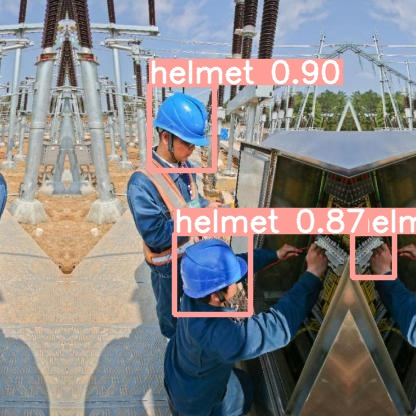

In [ ]:
image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'))
display(Image(filename=image_name))

* 주차공간 데이터셋

In [ ]:
%mkdir /content/yolov5/pklot
%cd /content/yolov5/pklot

/content/yolov5/pklot


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
# 데이터 내려받기
!curl -L 'https://public.roboflow.com/ds/u5bwvxO3fg?key=yypDl0kBMt' > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# yolov5s.pt 를 적용하여 추가 학습 없이 detecting
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source pklot/test/images

detect: weights=['yolov5s.pt'], source=pklot/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 107MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1242 /content/yolov5/pklot/test/images/2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg: 640x640 6 cell phones, 13.4ms
image 2/1242 /content/yolov5/pklot/test/images/2012-09-11_16_48_36_jpg.rf.4ecc8c87c61680ccc73edc218a2c8d7d.jpg: 640x640 1 bottle, 5 cell phones, 13.4ms
image 3/1242 /content/yolov5/pklot/test/imag

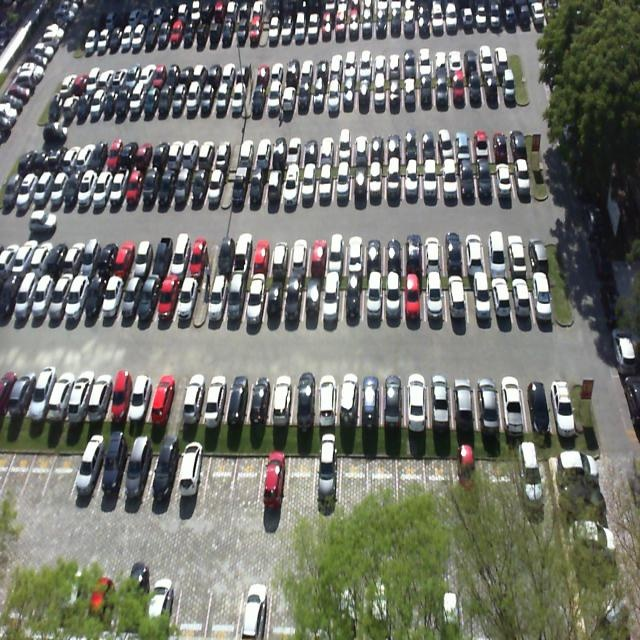

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'))
display(Image(filename=image_name))

In [ ]:
# 저장된 모델 불러오기
%cp /content/drive/MyDrive/best.pt /content/yolov5

In [ ]:
# 저장된 모델로 detecting
!python detect.py --weights best.pt --img 416 --conf 0.25 --source pklot/test/images/

detect: weights=['best.pt'], source=pklot/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1242 /content/yolov5/pklot/test/images/2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg: 416x416 31 space-emptys, 76 space-occupieds, 8.1ms
image 2/1242 /content/yolov5/pklot/test/images/2012-09-11_16_48_36_jpg.rf.4ecc8c87c61680ccc73edc218a2c8d7d.jpg: 416x416 30 space-emptys, 77 space-occupieds, 8.2ms
image 3/1242 /content/yolov5/pklot/t

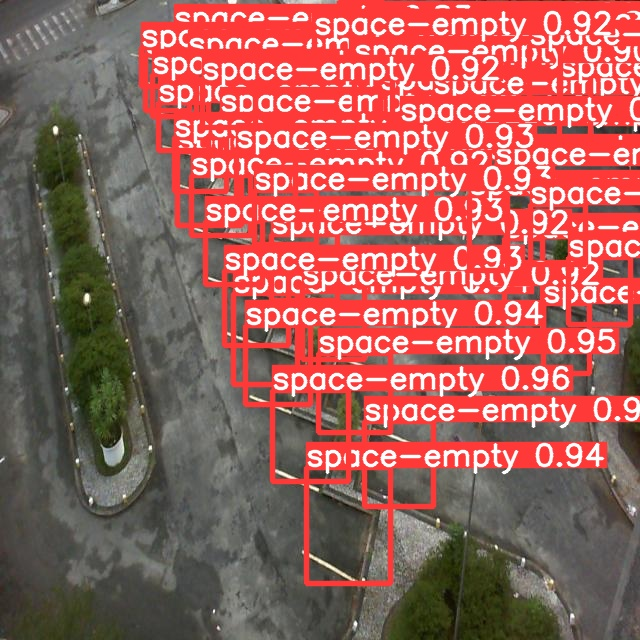

In [ ]:
image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'))
display(Image(filename=image_name))

## classifyvideo

In [ ]:
# Install
!git clone https://github.com/ultralytics/yolov5
%pip install -qr yolov5/requirements.txt

import os
import torch

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
# Example
VIDEO = '/content/drive/MyDrive/Colab_Notebooks/traffic.mp4'   # video example for analysis
DETECT = 'yolov5/detect.py'    # path to Yolo detect.py
IMG_WIDTH = 200                # compreesing video to speed up calculations
CONFIDENCE = 0.4               # confidence threashold for object detection #0.25 - standard
NUMBER_OF_APPEARANCES = 50     # an object describe the video if it appears in more than 50 frames (= 2 sec)
PROJECT = 'example_project'    # project directory to save result
NAME = 'example'               # project directory to save result

* base64\
https://devuna.tistory.com/41

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# 영상을 재생하는 사용자 함수 정의
def play(filename):
  html = ''
  video = open(filename, 'rb').read()
  src = 'data:video/mp4;base64,' + b64encode(video).decode()   # video 인코딩 후 디코딩
  html += '<video width=330 controls autoplay loop><source src="%s" type="video/mp4"></video>' % src

  return HTML(html)

In [ ]:
play(VIDEO)

In [ ]:
!python $DETECT --source $VIDEO --save-txt --img $IMG_WIDTH --project $PROJECT --name $NAME --conf-thres $CONFIDENCE

detect: weights=yolov5/yolov5s.pt, source=/content/drive/MyDrive/Colab_Notebooks/traffic.mp4, data=yolov5/data/coco128.yaml, imgsz=[200, 200], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=example_project, name=example, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 115MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ --img-size [200, 200] must be multiple of max stride 32, updating to [224, 224]
video 1/1 (1/3600) /content/drive/MyDrive/Colab_Notebooks/traffic.mp4: 128x224 6 cars, 15.7ms
video 1/1 (2/3600) /content/drive/MyDrive/Colab_Notebooks/traffic.mp4: 128x224 6 cars, 11.2ms
video 1/1 

In [ ]:
# Result
import shutil
shutil.copy('/content/drive/MyDrive/Colab_Notebooks/traffic.mp4',
            '/content/drive/MyDrive/Colab_Notebooks/traffic_output.mp4')

'/content/drive/MyDrive/Colab_Notebooks/traffic_output.mp4'